<a href="https://colab.research.google.com/github/markmaloba/DSCORE-Week-9-Independent-Project/blob/master/(NB)_DSCORE_Week_9_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Long ago, in a distant land, email was established as a form of communication for the public, those who would wish to do us harm followed right on the heels of this invention, tying all they could to turn it into a proponent for EVIL!

However, not all hope is lost! The realm of men (read *consumer emails*) is protected by valiant warriors (read *Nerdy Machine Learning Engineers*) on the frontlines battling spam email and its propagators.

The dataset used here is a result ofsuch an attempt by Hewlett-PAckard engineers. Luckily, the data has been cleaned quite well, and already tokenized for our use, so there is no need to use any natural language processing toolkits.



### Defining the question

Using a sample of 4600 emails, all correctly identified as either SPAM or NOT SPAM, can we create a Machine Learning model that correctly categorizes received emails in either of the two categories?

### Metric for success

Modern email spam filters are not 100 percent accurate. Google, for example, has a distinct advantage in this space by virtue of providing the service that handles about **twenty percent** (that's a conservative estimate) of opened emails worldwide. At 111 billion consumer emails sent per day, 20% is a pretty large chunk of that.

That means that they have A LOT more data to work with, and they have continually refined their AI as far as spam filtering goes.

With our modest DATASET, I'd be very comfortable with a 70% accuracy rate, and OVERJOYED if 80% is achieved.

### Experimental design choices

We will use a Gaussian Naive Bayes algorithm to solve this problem, for reasons explained as we go along.

### Appropriateness of the data to answer our question

AS far as sppropriateness goes, the answer is 1-for-1. You need smaple emails for analysis if you are to categorize them as spam. That's what we have here, a PROPER sample of 4600 emails to use in our analysis. Yes the data is appropriate.

In [0]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [0]:
import seaborn as sns
%matplotlib inline


In [0]:
# Loading our data

spam_df = pd.read_csv('spambase.data')
spam_df.head(10)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.96,3.84,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


In [0]:
spam_df.shape

(4600, 58)

This dataset came with the column names and data separated, so I'll have to manually rename the columns.

In [0]:
# Spambase columns renaming

spam_col = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'SPAM'
]

In [0]:
spam_df.columns = spam_col
spam_df.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SPAM
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.96,3.84,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


That's much better. Remember, emails that are *actually* SPAM = 1, and those that are *not* SPAM = 0

# Exploring our dataset

In [0]:
spam_df.shape

(4600, 58)

In [0]:
spam_df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

Ecah row represents a single email. There are 4600 rows in total. There are 58 columns. The last column (SPAM) serves as our label, and indicates whether or not an email was marked as spam inn our test dataset.

The other columns might seem like a jumbled mess, but they're easy to understand. A separate analysis of spam emails was done by the folks at Hewlett-Packard Labs. They are the same people that generated this dataset for us, by sampling internal employee emails.

Certain words, punctuation marks and capitalization patterns were identified to be most prevalent in spam emails. 

So in each of the other 57 columns, the number indicated is the frequency with which these elements appeared in the email (remember, each row represents an email).

# EDA

Due to the nature of our data set (numerical, with each column representing the frequency with which certain words appear), it would be very useful to study the sums of each words, to see the most common. You could say this is a low-low-low level of natural language processing.

These fine science people  went to the trouble of quantifying these frequencies, so it's the least we can do :D 

In [0]:
# Most prevalent words

spam_df.sum(axis=0).sort_values( ascending=False)


capital_run_length_total      1303136.000
capital_run_length_longest     239986.000
capital_run_length_average      23882.405
word_freq_you                    7645.390
word_freq_your                   3724.750
word_freq_george                 3530.370
word_freq_hp                     2528.270
word_freq_will                   2491.730
SPAM                             1812.000
word_freq_our                    1436.220
word_freq_re                     1385.930
word_freq_all                    1290.660
char_freq_!                      1237.217
word_freq_hpl                    1221.030
word_freq_free                   1144.630
word_freq_mail                   1101.540
word_freq_address                 979.440
word_freq_email                   848.720
word_freq_edu                     827.370
word_freq_business                656.040
char_freq_(                       639.679
word_freq_1999                    630.120
word_freq_meeting                 608.890
word_freq_650                     

I feel like there's not much more we can do as far as univariate analysis goes, because our columns all represent word counts. Best we can do is compare them against eachother, checking for prevalence and making inferences from that. That makes this *both* a univariate and bivariate analysis of our data.

Alright, so, ignoring our prepositions, pronouns and auxiliary verbs, we start to get a sense of common names, phrases etc.

We will also ignore the *capital_run...* stats as they only take into account different ways in which capital letters are combined etc.

Now, I know what you're thinking, WHO THE HELL IS GEORGE!? And why is he hell bent on scamming Hewlett PAckard's  employees of their hard earned cash??

It makes sense that hp ranks way up there as well. One possibility is that the phrase appears in *actual* email addresses, however I'm very confident that for this analysis, they probably checked the subject and body of the emails. So knowing this, the prevalence of the phrase "hp" may indicate that a high number of these emails (about 50%) are phishing emails, trying to dupe employees into thinking the email is official Hewlett Packard communication, and in turn get them to volunteer some kind of information or money etc.

If we yank this conspiracy string further, maybe GEORGE is a scorned ex employee, trying to craft these hp-styled emails (he knows internal operations so he'd understand how to make them convincing) to scam his ex co-workers.

Moving on...

We can see that the exclamation mark is also prevalent since THE ONLY WAY YOU CAN CONVINCE SOMEONE THAT THE DEPOSED NIGERIAN KING NEEDS THEIR HELP IS BY SHOUTING IT AT THEM!!!!!

Next we have the phrase "hp1" which reinforces my phishing theory above. hp1 might be part of a fake domain created by attackers (we know it's you, George!) to be used in these phishing attempts, since hp.com (or whatever official domain) is obviously taken.

Lastly we see the word "free" is also very prevalent in these emails. Makes sense in our context here, trying to trick people. We all love free stuff, yo!

## Correlation

We can attempt to look at correlation between different phrases and hopefully spot patterns indicating the combinations in which these phrases are used.

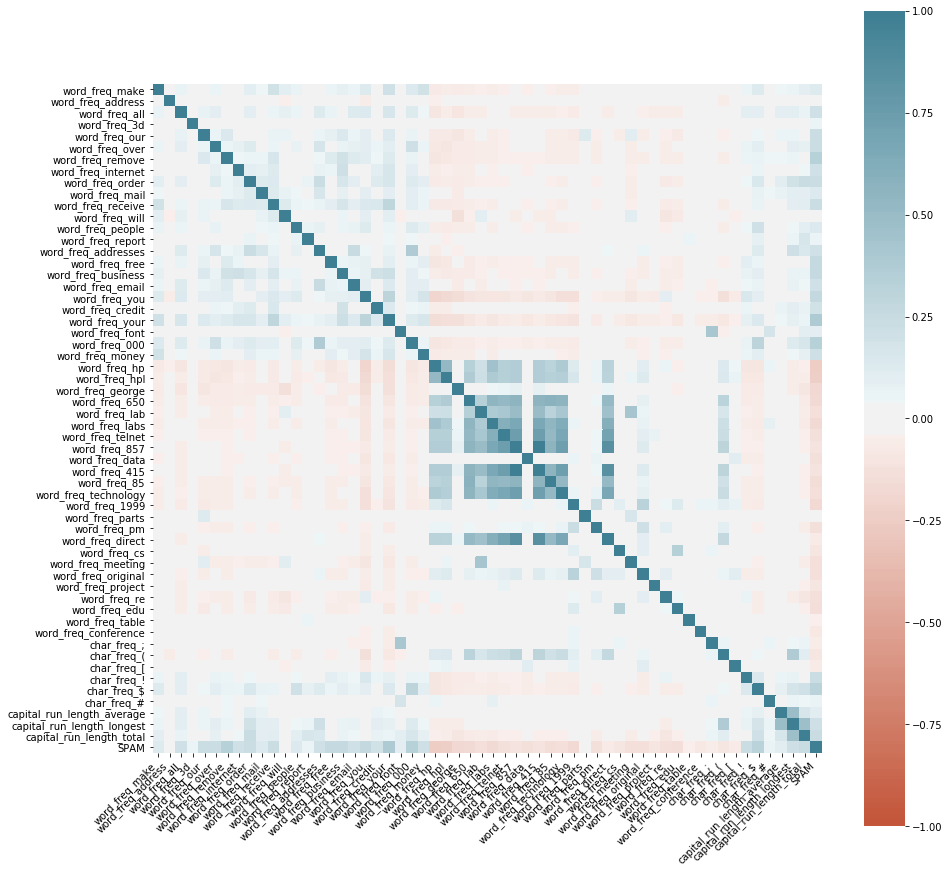

In [0]:
corr = spam_df.corr()

plt.figure(figsize = (15,15))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As expected, the correlation our variables have with eachother are very weak.

# Modeling

We are using a Gaussian Naive Bayes model for this analysis. 

If we had actual text data in our fields where tokenizatoin was involved, then the multinomial model would have been more appropriate.

In [0]:
# Setting x and y (features and labels)
x = spam_df.iloc[:, 0:-1]
y = spam_df.iloc[:, -1]

model = GaussianNB()
# model.fit(dataset.data, dataset.target)
model.fit(x, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
expected = y
predicted = model.predict(x)

In [0]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      2788
           1       0.70      0.96      0.81      1812

    accuracy                           0.82      4600
   macro avg       0.83      0.85      0.82      4600
weighted avg       0.86      0.82      0.82      4600

[[2047  741]
 [  74 1738]]


# Challenging our solution & Conclusion

First of all, our score is pretty good, and considering we used all 57 attributes available, there's nothing ore to be done as far as feature selection for our model goes. Perhaps the score (82% accuracy) will go up if we use a different model, but I will not try that at this time, considering how much success we've had with the GaussianNB.

HOWEVER, I have a few problems with the dataset. I feel like it is too context specific, in this case being specific to Hewlett Packard employees. I mentioned that Google has an advantage here, since they handle consumer emails for users all over the world. If oyu make these comparisons, then it's clear that our data is **VERY BIASED**, and as a result our model would perform **terribly** on a standard consumer emails dataset.